<a href="https://colab.research.google.com/github/meetGAUROB/JustWatch-WebScraping/blob/main/JustWatch_WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install wordcloud

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

In [ ]:
movie_info = soup.find_all('div', class_='title-list-grid__item')

## **Fetching Movie URL's**

In [ ]:
movie_url_list = []
for movie in movie_info:
  get_link = movie.find('a')['href']
  links = 'https://www.justwatch.com'+ get_link
  movie_url_list.append(links)
movie_url_list
len(movie_url_list)

100

## **Iterating Through each url and scrap all the details**

In [ ]:
%%time
# making the empty list for all the details
movie_title_list = []
release_year_list = []
genres_list = []
imdb_rating_list = []
runtime_list = []
age_rating_list = []
production_countries_list = []
streaming_service_list = []

#iterating the movie url from the url list.
for movie_url in movie_url_list:
  print(f"Scraping for movie url {movie_url}")
  # Requesting the response from each movie url
  response = requests.get(movie_url)
  #exception handling for success and not found
  if response.status_code==200:
    url_soup = BeautifulSoup(response.text, 'html.parser')

    #Extract movie title
    title_tag = url_soup.find('div', class_='title-block' )
    if title_tag:
      movie_title = title_tag.find('h1').text.strip()
      movie_title_list.append(movie_title)
    else:
      movie_title_list.append(None)

    #Extract Release Year
    year_tag = url_soup.find('span', class_='text-muted')
    if year_tag:
      release_year = re.sub(r"\(|\)", "", year_tag.text.strip())
      release_year_list.append(release_year)
    else:
      release_year_list.append(None)

    #Extract Genres.
    genre_tag = url_soup.find('h3', text='Genres')
    if genre_tag:
      genres = genre_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      genres_list.append(genres)
    else:
      genres_list.append(None)

    #Extract imdb rating
    rating_tag = url_soup.find('img', alt='IMDB')
    if rating_tag:
      imdb_rating = rating_tag.find_next_sibling('span').text.strip()
      imdb_rating_list.append(imdb_rating[:3])
    else:
      imdb_rating_list.append(None)

    # Extract runtime
    runtime_tag = url_soup.find('h3', text='Runtime')
    if runtime_tag:
      runtime = runtime_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      runtime_list.append(runtime)
    else:
      runtime_list.append(None)

    #Extract age rating
    age_rating_tag = url_soup.find('h3', text = 'Age rating')
    if age_rating_tag:
      age_rating = age_rating_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      age_rating_list.append(age_rating)
    else:
      age_rating_list.append(None)

    #Extract Production countries
    production_tag = url_soup.find('h3', text=' Production country ')
    if production_tag:
      prod_countries = production_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()
      production_countries_list.append(prod_countries)
    else:
      production_countries_list.append(None)

    #Extract streaming service
    streaming = url_soup.find('picture', class_='picture-wrapper')
    if streaming:
      strm_service = streaming.find('img')['alt']
      streaming_service_list.append(strm_service)
    else:
      streaming_service_list.append(None)

  else:
    print(f"Scraping Fail for Movie url {movie_url}")

Scraping for movie url https://www.justwatch.com/in/movie/animal-2022


<timed exec>:37: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
<timed exec>:53: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
<timed exec>:61: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
<timed exec>:69: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.


Scraping for movie url https://www.justwatch.com/in/movie/salaar
Scraping for movie url https://www.justwatch.com/in/movie/12th-fail
Scraping for movie url https://www.justwatch.com/in/movie/sam-bahadur
Scraping for movie url https://www.justwatch.com/in/movie/aquaman-and-the-lost-kingdom
Scraping for movie url https://www.justwatch.com/in/movie/hanu-man
Scraping for movie url https://www.justwatch.com/in/movie/dunki
Scraping for movie url https://www.justwatch.com/in/movie/oppenheimer
Scraping for movie url https://www.justwatch.com/in/movie/ssmb-28
Scraping for movie url https://www.justwatch.com/in/movie/nani30
Scraping for movie url https://www.justwatch.com/in/movie/devil-2023
Scraping for movie url https://www.justwatch.com/in/movie/sapta-sagaradaache-ello-side-b
Scraping for movie url https://www.justwatch.com/in/movie/neru
Scraping for movie url https://www.justwatch.com/in/movie/the-marvels
Scraping for movie url https://www.justwatch.com/in/movie/the-kerala-story
Scraping for

## **Scrapping Movie Title**

In [ ]:
len(movie_title_list)

100

## **Scrapping release Year**

In [ ]:
release_year_list[:50]

['2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2024',
 '2024',
 '2024',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2014',
 '2020',
 '2021',
 '2023',
 '2022',
 '2001',
 '2024',
 '2023',
 '2023',
 '2023']

## **Scrapping Genres**

In [ ]:
# Write Your Code here
genres_list[:50]

['Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Drama',
 'War & Military, Drama, History',
 'Fantasy, Action & Adventure, Science-Fiction',
 'Comedy, Fantasy, Action & Adventure',
 'Drama, Comedy',
 'Drama, History',
 'Action & Adventure, Drama, Kids & Family',
 'Kids & Family, Romance, Drama',
 'Mystery & Thriller, Action & Adventure, Drama',
 'Drama, Romance',
 'Drama, Mystery & Thriller',
 'Science-Fiction, Action & Adventure, Fantasy',
 'Drama',
 'Action & Adventure, Mystery & Thriller, War & Military',
 'Crime, History, Drama, Romance, Western',
 'Comedy, Romance',
 'Drama, Mystery & Thriller, Action & Adventure',
 'Mystery & Thriller, Drama',
 'Mystery & Thriller, Action & Adventure',
 'Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Mystery & Thriller',
 'Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Comedy, Kids & Family, Animation, Fantasy',
 'Drama',
 'Drama, Crime, Mystery & T

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
imdb_rating_list

['6.4',
 '6.5',
 '9.1',
 '7.9',
 '5.7',
 '8.5',
 '7.2',
 '8.4',
 '5.7',
 '8.3',
 '6.7',
 '8.1',
 '7.6',
 '5.6',
 '7.1',
 '7.4',
 '7.7',
 '6.5',
 '7.0',
 '7.9',
 '7.7',
 '7.0',
 '5.8',
 '6.4',
 '6.7',
 '7.8',
 '7.8',
 '7.9',
 '6.9',
 '5.5',
 '6.2',
 '5.1',
 None,
 '6.8',
 '7.0',
 '7.9',
 '7.6',
 '7.1',
 '7.2',
 '7.6',
 '8.7',
 '3.3',
 '8.0',
 '8.3',
 '8.8',
 '7.6',
 '7.8',
 '7.1',
 '8.2',
 '6.7',
 '8.1',
 '6.0',
 '6.3',
 '6.6',
 '5.2',
 '7.3',
 '8.1',
 '6.4',
 '6.4',
 '8.3',
 '8.2',
 '7.5',
 '5.9',
 '7.6',
 '8.0',
 '6.0',
 '8.2',
 '7.5',
 '8.8',
 '6.0',
 '6.7',
 '7.8',
 '6.9',
 '6.8',
 '6.8',
 '7.1',
 '8.3',
 '5.2',
 '6.4',
 '6.1',
 '6.1',
 '5.4',
 '8.0',
 '7.8',
 '8.2',
 '8.4',
 '7.3',
 '8.6',
 '6.4',
 '6.7',
 '7.0',
 '7.9',
 '5.8',
 '7.4',
 '8.4',
 '5.6',
 '8.3',
 '7.8',
 '4.2',
 '7.7']

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
runtime_list[:50]

['3h 21min',
 '2h 55min',
 '2h 26min',
 '2h 30min',
 '2h 4min',
 '2h 39min',
 '2h 40min',
 '3h 0min',
 '2h 39min',
 '2h 35min',
 '2h 24min',
 '2h 28min',
 '2h 30min',
 '1h 45min',
 '2h 18min',
 '2h 47min',
 '3h 26min',
 '1h 43min',
 '2h 37min',
 '2h 7min',
 '2h 44min',
 '2h 49min',
 '2h 35min',
 '1h 45min',
 '1h 23min',
 '1h 45min',
 '2h 31min',
 '2h 24min',
 '1h 54min',
 '1h 46min',
 '2h 35min',
 '2h 18min',
 '2h 21min',
 '1h 57min',
 '2h 11min',
 '1h 46min',
 '1h 52min',
 '1h 35min',
 '2h 43min',
 '2h 27min',
 '2h 49min',
 '1h 54min',
 '2h 35min',
 '2h 38min',
 '2h 46min',
 '2h 32min',
 '2h 24min',
 '1h 56min',
 '2h 15min',
 '2h 25min']

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
age_rating_list[50]

'A'

## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
production_countries_list[50]

'United States, Australia'

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
streaming_service_list[50]

'Apple TV'

## **Now Creating Movies DataFrame**

In [ ]:
movies_df = pd.DataFrame()
movies_df['Movie Title'] = movie_title_list
movies_df['Movie Link'] = movie_url_list
movies_df['Release Year'] = release_year_list
movies_df['Genre'] = genres_list
movies_df['IMDB Rating'] = imdb_rating_list
movies_df['Runtime'] = runtime_list
movies_df['Age Rating'] = age_rating_list
movies_df['Production Countries'] = production_countries_list
movies_df['Streaming Service'] = streaming_service_list
movies_df

,Movie Title,Movie Link,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Countries,Streaming Service
0,Animal,https://www.justwatch.com/in/movie/animal-2022,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.4,3h 21min,A,India,Netflix
1,Salaar,https://www.justwatch.com/in/movie/salaar,2023,"Action & Adventure, Crime, Drama, Mystery & Th...",6.5,2h 55min,A,India,Netflix
2,12th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.1,2h 26min,None,India,Hotstar
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,"War & Military, Drama, History",7.9,2h 30min,UA,India,Zee5
4,Aquaman and the Lost Kingdom,https://www.justwatch.com/in/movie/aquaman-and...,2023,"Fantasy, Action & Adventure, Science-Fiction",5.7,2h 4min,None,United States,Apple TV
...,...,...,...,...,...,...,...,...,...
95,The Nun II,https://www.justwatch.com/in/movie/the-nun-ii,2023,"Horror, Mystery & Thriller",5.6,1h 50min,A,United States,Apple TV
96,Top Gun: Maverick,https://www.justwatch.com/in/movie/top-gun-mav...,2022,"Drama, Action & Adventure",8.3,2h 10min,UA,United States,Apple TV
97,Manchester by the Sea,https://www.justwatch.com/in/movie/manchester-...,2016,Drama,7.8,2h 18min,A,United States,Apple TV
98,Agent,https://www.justwatch.com/in/movie/agent,2023,"Mystery & Thriller, Action & Adventure",4.2,2h 34min,UA,India,None


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   Movie Link            100 non-null    object
 2   Release Year          100 non-null    object
 3   Genre                 100 non-null    object
 4   IMDB Rating           99 non-null     object
 5   Runtime               100 non-null    object
 6   Age Rating            58 non-null     object
 7   Production Countries  100 non-null    object
 8   Streaming Service     83 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


## **Scraping TV  Show Data**

In [ ]:
#importing the concurrency
from concurrent.futures import ThreadPoolExecutor

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

In [ ]:
tv_info = soup.find_all('div', class_='title-list-grid__item')

## **Fetching Tv shows Url details**

In [ ]:
tv_url_list = []
for url in tv_info:
  get_link = url.find('a')['href']
  tv_link = 'https://www.justwatch.com' + get_link
  tv_url_list.append(tv_link)

len(tv_url_list)

100

## **Iterating each url to scrape all details in concurrency**

In [ ]:
show_title_list = []
show_year_list = []
show_genre_list = []
show_imdb_rating_list = []
show_age_rating_list = []
show_production_country_list = []
show_streaming_list = []
show_runtime_list = []

In [ ]:
%%time
def scrape_show_details(tv_url):
  try:
    # print(f"Scraping tv_show url {tv_url} ")
    response = requests.get(tv_url)
    if response.status_code == 200:
      tv_soup = BeautifulSoup(response.text, 'html.parser')

      #Extract Tv-show title
      show_title_tag = tv_soup.find('div', class_='title-block')
      if show_title_tag:
        show_title = show_title_tag.find('h1').text.strip()

      else:
        show_title = None

      #Extract release year
      show_year_tag = tv_soup.find('span', class_='text-muted')
      if show_year_tag:
        show_year = re.sub(r"\(|\)", "", show_year_tag.text.strip())

      else:
        show_year = None

      #Extract Show genre
      show_genre_tag = tv_soup.find('h3', text = "Genres")
      if show_genre_tag:
        show_genre = show_genre_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_genre = None

      #Extract IMDB ratings
      show_imdb_rating_tag = tv_soup.find('img', alt='IMDB')
      if show_imdb_rating_tag:
        show_imdb_rating = show_imdb_rating_tag.find_next_sibling('span').text.strip()

      else:
        show_imdb_rating = None

      #Extract Age rating
      show_age_rating_tag = tv_soup.find('h3', text='Age rating')
      if show_age_rating_tag:
        show_age_rating = show_age_rating_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_age_rating =  None

      #Extract show_production country
      show_country_tag = tv_soup.find('h3', text=' Production country ')
      if show_country_tag:
        show_country = show_country_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_country = None

      #Extract streaming service
      show_stream_tag = tv_soup.find('picture', class_='picture-wrapper')
      if show_stream_tag:
        show_stream = show_stream_tag.find('img')['alt']

      else:
        show_stream = None

      #Extract runtime
      show_runtime_tag = tv_soup.find('h3', text='Runtime')
      if show_runtime_tag:
        show_runtime = show_runtime_tag.find_next_sibling('div', class_='detail-infos__value').text.strip()

      else:
        show_runtime = None

      return (show_title, show_year, show_genre, show_imdb_rating, show_age_rating, show_country, show_stream, show_runtime)

    else:
      print(f'Scraping Fail for tv-show url {tv_url}')
      return None
  except Exception as e:
      print(f"Exception occurred for {tv_url}: {e}")
      return None

with ThreadPoolExecutor(max_workers=10) as executor:
  results = executor.map(scrape_show_details, tv_url_list)
  # Process the results
  for result in results:
       if result:

           show_title_list.append(result[0])

           show_year_list.append(result[1])
           show_genre_list.append(result[2])
           #'NoneType' object is not subscriptable
           if result[3] is not None:
            show_imdb_rating_list.append(result[3][0:3])
           else:
            show_imdb_rating_list.append(None)

           show_age_rating_list.append(result[4])
           show_production_country_list.append(result[5])
           show_streaming_list.append(result[6])
           show_runtime_list.append(result[7])

<timed exec>:25: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
<timed exec>:41: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
<timed exec>:49: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
<timed exec>:65: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.


CPU times: user 22.6 s, sys: 567 ms, total: 23.2 s
Wall time: 20.1 s


## **Fetching Tv Show Title details**

In [ ]:
len(show_title_list)

100

## **Fetching Release Year**

In [ ]:
# Write Your Code here
len(show_year_list)

100

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
len(show_genre_list)

100

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
show_imdb_rating_list

['6.2',
 '8.9',
 '8.5',
 '8.1',
 '9.2',
 '8.9',
 '8.4',
 '7.0',
 '3.7',
 '8.7',
 '9.2',
 '8.6',
 '6.3',
 '6.9',
 '8.4',
 '7.9',
 '8.8',
 '7.0',
 '7.8',
 '7.1',
 '8.6',
 '8.2',
 '8.9',
 '7.0',
 '7.3',
 '8.1',
 '7.9',
 '8.6',
 '8.0',
 None,
 '7.8',
 '7.9',
 '8.2',
 '7.4',
 '7.2',
 '8.8',
 '9.3',
 '3.4',
 '8.7',
 '8.5',
 '8.7',
 '9.5',
 '5.9',
 '8.0',
 '8.9',
 '9.1',
 '7.2',
 '8.7',
 '8.1',
 '8.5',
 '6.5',
 '8.3',
 '8.5',
 '8.4',
 '7.1',
 '6.8',
 '8.1',
 '7.5',
 '7.9',
 '8.7',
 '7.5',
 '8.0',
 '9.2',
 '8.8',
 '8.7',
 '8.5',
 '6.3',
 '8.7',
 '5.1',
 '8.7',
 None,
 '8.7',
 '8.4',
 '9.0',
 '8.0',
 '8.4',
 '8.1',
 '7.2',
 None,
 '7.2',
 '8.3',
 '7.2',
 '8.2',
 '6.4',
 '8.4',
 '8.3',
 '7.6',
 '6.5',
 '8.0',
 None,
 '7.6',
 '8.0',
 '7.6',
 '7.8',
 '7.3',
 '7.4',
 '3.7',
 '8.3',
 '8.1',
 '8.5']

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
len(show_age_rating_list)

100

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
len(show_production_country_list)

100

## **Fetching Streaming Service details**

In [ ]:
# Write Your Code here
len(show_streaming_list)

100

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
len(show_runtime_list)

100

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_show_df = pd.DataFrame()
tv_show_df['Show Title'] = show_title_list
tv_show_df['TV Show Link'] = tv_url_list
tv_show_df['Release Year'] = show_year_list
tv_show_df['Show Genre'] = show_genre_list
tv_show_df['IMDB Rating'] = show_imdb_rating_list
tv_show_df['Age Rating'] = show_age_rating_list
tv_show_df['Production Country'] = show_production_country_list
tv_show_df['Streaming Service'] = show_streaming_list
tv_show_df['Runtime'] = show_runtime_list

tv_show_df

,Show Title,TV Show Link,Release Year,Show Genre,IMDB Rating,Age Rating,Production Country,Streaming Service,Runtime
0,Indian Police Force,https://www.justwatch.com/in/tv-show/indian-po...,2024,"Crime, Action & Adventure",6.2,A,India,Amazon Prime Video,38min
1,True Detective,https://www.justwatch.com/in/tv-show/true-dete...,2014,"Drama, Crime, Mystery & Thriller",8.9,U,United States,Jio Cinema,1h 0min
2,Mirzapur,https://www.justwatch.com/in/tv-show/mirzapur,2018,"Action & Adventure, Crime, Drama, Mystery & Th...",8.5,None,India,Amazon Prime Video,50min
3,Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,"Action & Adventure, Crime, Drama, Mystery & Th...",8.1,A,United States,Amazon Prime Video,48min
4,Game of Thrones,https://www.justwatch.com/in/tv-show/game-of-t...,2011,"Drama, Action & Adventure, Science-Fiction, Fa...",9.2,U,United States,Jio Cinema,58min
...,...,...,...,...,...,...,...,...,...
95,The Twelve,https://www.justwatch.com/in/tv-show/the-twelve,2019,"Mystery & Thriller, Drama",7.4,None,Belgium,Netflix,54min
96,Paurashpur,https://www.justwatch.com/in/tv-show/paurashpur,2020,Drama,3.7,A,India,Alt Balaji,25min
97,How I Met Your Mother,https://www.justwatch.com/in/tv-show/how-i-met...,2005,"Comedy, Romance, Drama",8.3,U,United States,Hotstar,24min
98,Wednesday,https://www.justwatch.com/in/tv-show/wednesday,2022,"Science-Fiction, Fantasy, Comedy, Crime, Kids ...",8.1,None,United States,Netflix,49min


In [ ]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Show Title          100 non-null    object
 1   TV Show Link        100 non-null    object
 2   Release Year        100 non-null    object
 3   Show Genre          100 non-null    object
 4   IMDB Rating         96 non-null     object
 5   Age Rating          29 non-null     object
 6   Production Country  100 non-null    object
 7   Streaming Service   93 non-null     object
 8   Runtime             100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


## **Task 2 :- Data Filtering & Analysis**

TV show df -->tv_show_df

movie df --> movies_df

      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.

### **For Movies**

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Movie Title           100 non-null    object
 1   Movie Link            100 non-null    object
 2   Release Year          100 non-null    object
 3   Genre                 100 non-null    object
 4   IMDB Rating           99 non-null     object
 5   Runtime               100 non-null    object
 6   Age Rating            58 non-null     object
 7   Production Countries  100 non-null    object
 8   Streaming Service     83 non-null     object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Changing the type of some columns.
movies_df['Release Year'] = movies_df['Release Year'].astype(int)
movies_df['IMDB Rating'] = movies_df['IMDB Rating'].astype(float)
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Movie Title           100 non-null    object 
 1   Movie Link            100 non-null    object 
 2   Release Year          100 non-null    int64  
 3   Genre                 100 non-null    object 
 4   IMDB Rating           99 non-null     float64
 5   Runtime               100 non-null    object 
 6   Age Rating            58 non-null     object 
 7   Production Countries  100 non-null    object 
 8   Streaming Service     83 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [ ]:
# Write Your Code here
filtered_movie_df = movies_df[(movies_df['Release Year'] >=2022) & (movies_df['IMDB Rating'] >=7) ]
len(filtered_movie_df)

46

### **For Tv-Shows**

In [ ]:
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Show Title          100 non-null    object
 1   TV Show Link        100 non-null    object
 2   Release Year        100 non-null    object
 3   Show Genre          100 non-null    object
 4   IMDB Rating         96 non-null     object
 5   Age Rating          29 non-null     object
 6   Production Country  100 non-null    object
 7   Streaming Service   93 non-null     object
 8   Runtime             100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
# Changing the type for IMDB and Year.
tv_show_df['Release Year'] = tv_show_df['Release Year'].astype(int)
tv_show_df['IMDB Rating'] = tv_show_df['IMDB Rating'].astype(float)
tv_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Title          100 non-null    object 
 1   TV Show Link        100 non-null    object 
 2   Release Year        100 non-null    int64  
 3   Show Genre          100 non-null    object 
 4   IMDB Rating         96 non-null     float64
 5   Age Rating          29 non-null     object 
 6   Production Country  100 non-null    object 
 7   Streaming Service   93 non-null     object 
 8   Runtime             100 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.2+ KB


In [ ]:
filtered_tv_show_df = tv_show_df[(tv_show_df['Release Year'] >=2022) & (tv_show_df['IMDB Rating'] >=7) ]
len(filtered_tv_show_df)

34

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

      - Calculate the average IMDb rating for the scraped movies and TV shows.


### **For Movies**

In [ ]:
mean_imdb_movie = movies_df['IMDB Rating'].mean()
avg_imdb_movie = round(mean_imdb_movie, 2)
print(f"The Average IMDB Rating for Movies is {avg_imdb_movie}")

The Average IMDB Rating for Movies is 7.12


### **For TV Shows**

In [ ]:
mean_imdb_tv = tv_show_df['IMDB Rating'].mean()
avg_imdb_tv = round(mean_imdb_tv, 2)
print(f"The Average IMDB Rating for TV show is {avg_imdb_tv}")

The Average IMDB Rating for TV show is 7.85


## **Analyzing Top Genres**

      - Identify the top 5 genres that have the highest number of available movies and TV shows.


### **For Movies**

In [ ]:
# Write Your Code here
genre_count_movie = movies_df['Genre'].value_counts()
sorted_movie_genre = genre_count_movie.sort_values(ascending=False)
top_5_genre = sorted_movie_genre.head()
top_5_genre

Drama                                                   8
Mystery & Thriller, Action & Adventure                  4
Action & Adventure, Crime, Drama, Mystery & Thriller    3
Drama, Mystery & Thriller                               3
Comedy, Drama                                           3
Name: Genre, dtype: int64

**Visulaize it in WordCloud**

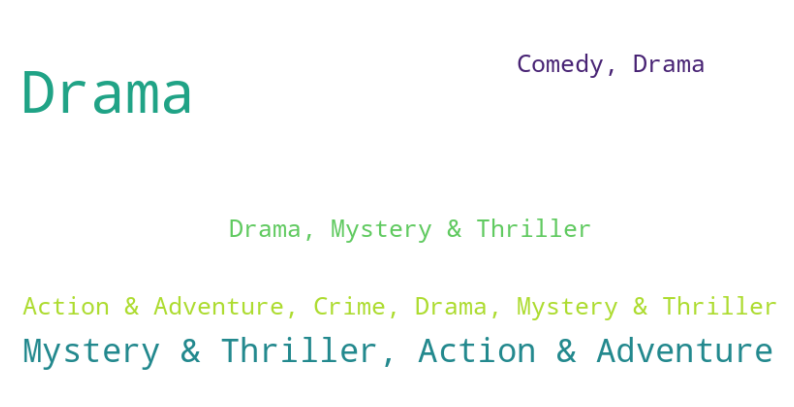

In [ ]:
movie_top_genre_dict = top_5_genre.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(movie_top_genre_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **For TV shows**

In [ ]:
genre_count_tv = tv_show_df['Show Genre'].value_counts()
sorted_tv_genre = genre_count_tv.sort_values(ascending=False)
top_5 = sorted_tv_genre.head()
top_5

Crime, Drama, Mystery & Thriller    9
Drama                               8
Crime, Drama                        4
Comedy                              3
Mystery & Thriller, Drama           3
Name: Show Genre, dtype: int64

**Let's Visvalize it using word cloud**

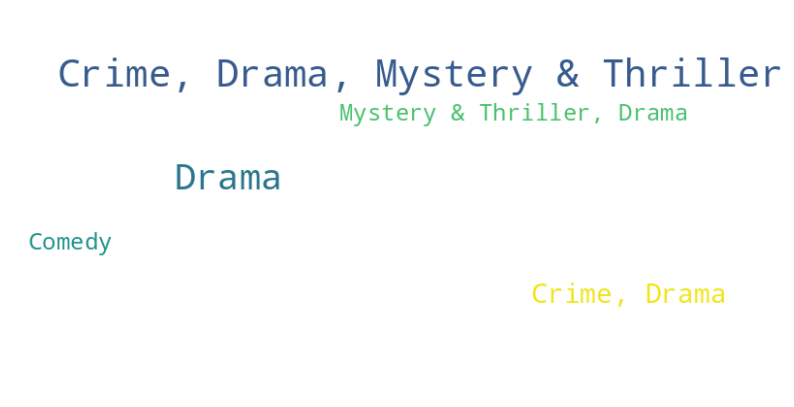

In [ ]:
#Let's Visvalize it using word cloud
tv_top_genre_dict = top_5.to_dict()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tv_top_genre_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

      - Determine the streaming service with the most significant number of offerings.

### **For Movies**

In [ ]:
# Write Your Code here
movie_streaming_service_count = movies_df['Streaming Service'].value_counts()
most_common_movie_service = movie_streaming_service_count.idxmax()
most_common_movie_service

'Apple TV'

**Let's Visvalize it using word cloud**

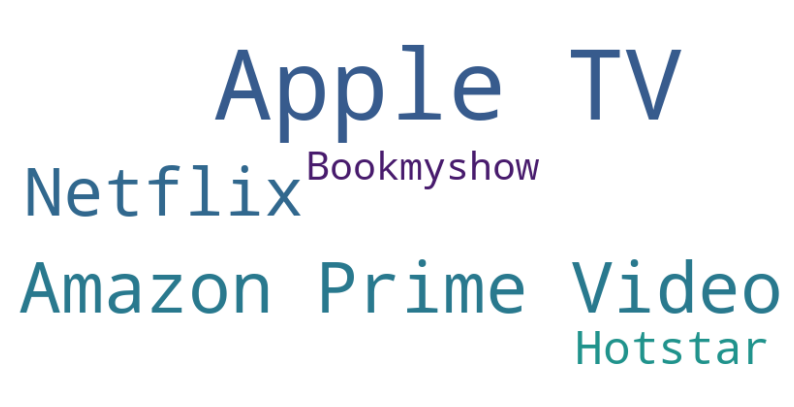

In [ ]:
top_5_movie_service_dict = movie_streaming_service_count.head().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_movie_service_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **For TV shows**

In [ ]:
# Write Your Code here
tv_streaming_service_count = tv_show_df['Streaming Service'].value_counts()
most_common_tv_service = tv_streaming_service_count.idxmax()
most_common_tv_service

'Netflix'

**Let's Visvalize it using word cloud**

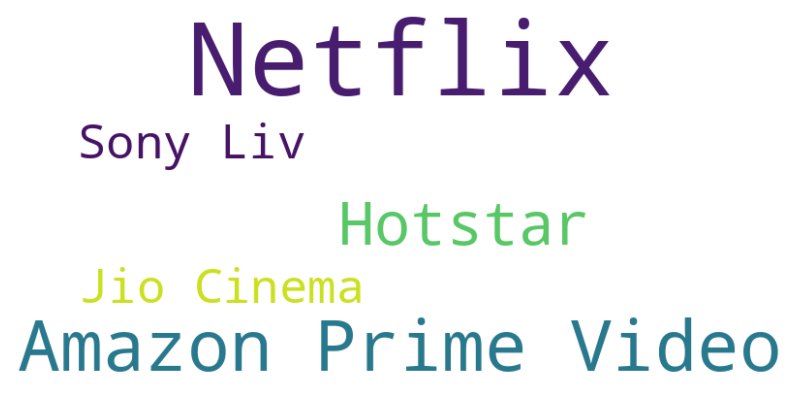

In [ ]:
top_5_tv_service_dict = tv_streaming_service_count.head().to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_5_tv_service_dict)

#Display the wordcloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
filtered_movie_df.head()

,Movie Title,Movie Link,Release Year,Genre,IMDB Rating,Runtime,Age Rating,Production Countries,Streaming Service
2,12th Fail,https://www.justwatch.com/in/movie/12th-fail,2023,Drama,9.1,2h 26min,None,India,Hotstar
3,Sam Bahadur,https://www.justwatch.com/in/movie/sam-bahadur,2023,"War & Military, Drama, History",7.9,2h 30min,UA,India,Zee5
5,Hanu-Man,https://www.justwatch.com/in/movie/hanu-man,2024,"Comedy, Fantasy, Action & Adventure",8.5,2h 39min,UA,India,None
6,Dunki,https://www.justwatch.com/in/movie/dunki,2023,"Drama, Comedy",7.2,2h 40min,None,India,Bookmyshow
7,Oppenheimer,https://www.justwatch.com/in/movie/oppenheimer,2023,"Drama, History",8.4,3h 0min,UA,"United States, United Kingdom",Apple TV


In [ ]:
filtered_tv_show_df.head()

,Show Title,TV Show Link,Release Year,Show Genre,IMDB Rating,Age Rating,Production Country,Streaming Service,Runtime
3,Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,2022,"Action & Adventure, Crime, Drama, Mystery & Th...",8.1,A,United States,Amazon Prime Video,48min
6,Solo Leveling,https://www.justwatch.com/in/tv-show/solo-leve...,2024,"Action & Adventure, Fantasy, Animation, Scienc...",8.4,None,"Japan, South Korea",Crunchyroll,24min
7,Death and Other Details,https://www.justwatch.com/in/tv-show/death-and...,2024,"Drama, Crime, Mystery & Thriller",7.0,None,United States,Hotstar,47min
14,Farzi,https://www.justwatch.com/in/tv-show/farzi,2023,"Crime, Drama, Mystery & Thriller",8.4,None,India,Amazon Prime Video,56min
16,The Last of Us,https://www.justwatch.com/in/tv-show/the-last-...,2023,"Drama, Horror, Science-Fiction, Mystery & Thri...",8.8,A,United States,Jio Cinema,58min


In [ ]:
#saving final dataframe as Final Data in csv format
movies_df.to_csv('Just watch Movies Info.csv', index=False)
tv_show_df.to_csv('Just watch TV Show Info.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
filtered_movie_df.to_csv('Recent Good Movies Info.csv', index=False)
filtered_tv_show_df.to_csv('Recent Good TV Show Info.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

**JustWatch Movies --**

https://drive.google.com/file/d/1WimS_XonOSHgOsAZU-aP_nWbvJMmgR_o/view?usp=drive_link



**JustWatch TV shows --**

https://drive.google.com/file/d/1AFkJiFhAvbxG8k5AzUZJtaU5taTtS2d2/view?usp=drive_link



**Recent Good Movies --**

https://drive.google.com/file/d/1Xyay27Tum1AMNw-z32gT9eb5s8Jmom2W/view?usp=drive_link



**Recent Good TV shows --**

https://drive.google.com/file/d/1C3Jf7LIitWj3aDTvVI7TC0xjujdyLjjl/view?usp=drive_link

# ***Congratulations!!! You have completed your Assignment.***